Download The CSV file from Kaggle https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/overview


In [7]:
!pip install torch==2.3.0
!pip install torchvision==0.18.0
!pip install numpy==1.24.3
!pip install pandas==2.0.3
!pip install matplotlib==3.7.2
!pip install scikit-learn==1.3.0
!pip install opencv-python==4.9.0
!pip install plotly==5.21.0
!pip install optuna==3.6.0
!pip install Pillow==10.2.0

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.2 MB 656.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.2 MB 2.0 MB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 2.9 MB/s eta 0:00:01
   ----------------------------------- ---- 1.1/1.2 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB 388.9 kB/s eta 0:00:39
   ---------------------------------------- 0.1/14.8 MB 798.9 kB/s eta 0:00:19
    -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.6 MB 825.8 kB/s eta 0:00:13
    --------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.3/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/10.6 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/10.6 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 3.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.6 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/10.6 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.6 MB 5.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.0/10.6 MB 5.6 MB/s eta 0:00:02
   -

ERROR: Ignored the following yanked versions: 3.4.11.39
ERROR: Could not find a version that satisfies the requirement opencv-python==4.9.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python==4.9.0


   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 487.6 kB/s eta 0:00:33
   ---------------------------------------- 0.1/15.7 MB 930.9 kB/s eta 0:00:17
    --------------------------------------- 0.2/15.7 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.4/15.7 MB 1.7 MB/s eta 0:00:09
   - -------------------------------------- 0.5/15.7 MB 2.1 MB/s eta 0:00:08
   -- ------------------------------------- 1.0/15.7 MB 3.3 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/15.7 MB 3.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/15.7 MB 4.5 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/15.7 MB 4.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.7/15.7 MB 5.4 MB/s eta 0:00:03
   ------- -------------------------------- 3.0/15.7 MB 5.6 MB/s eta 0:00:03
   ------

## Important Note

Please make sure to import the fer2013.csv or test.csv file from the https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data to the root folder of this app

## Imports


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
from torchvision.transforms import ToTensor, Compose
from PIL import Image, ImageEnhance
import plotly.graph_objects as go
import plotly.io as pio
import optuna
from torch.utils.data import SubsetRandomSampler
import torchvision.transforms as transforms

## Initialization


#### Check CUDA version


In [10]:
print(torch.version.cuda)
if torch.cuda.is_available():
    print("CUDA Version: ", torch.version.cuda)
    print("GPU: ", torch.cuda.get_device_name(0))

None


#### Constants


In [11]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CSV_FILE = "fer2013.csv"
NUM_EPOCHS = 30
CLASSES = [
    "angry",
    "disgust",
    "fear",
    "happiness",
    "sad",
    "surprise",
    "neutral",
]
pio.renderers.default = "notebook_connected"


#### Data Normalization and Augmentation


In [12]:
# Data augmentation
TRAIN_TRANSFORM = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
    # transforms.RandomRotation(12),
    # transforms.ToDtype(torch.float32, scale=True), # More or les the same results but slower perofrmance
    # transforms.RandomResizedCrop(size=(48, 48)), Bad Performance - Not recommended
])

TEST_TRANSFORM = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


## Core Module Classes


#### Data Initializer Class


In [13]:
class FERDataset(Dataset):
    """
    A custom dataset class for the Facial Emotion Recognition (FER) challenge dataset.
    This class allows for easy integration and usage with PyTorch data loaders.

    Attributes:
        data (pd.DataFrame): A DataFrame containing the image data and labels. Each row in the DataFrame
                             should contain an image's pixel data as a string and its associated label.
        transform (callable, optional): An optional function or transform that will be applied to each sample,
                                        typically used for data augmentation or converting images to tensors.

    Args:
        data (pd.DataFrame): The DataFrame holding the dataset, with each row representing an image
                             and its corresponding label. The image data should be in the form of a pixel
                             string that can be converted into an image array.
        transform (callable, optional): A function or transform that takes in an image as a numpy array
                                        and returns a transformed version of the image. Useful for preprocessing
                                        steps like normalization, scaling, and converting to tensor.

    Methods:
        __init__(data, transform=None): Initializes the FERDataset instance with dataset information and an optional transform.
        __len__(): Returns the total number of samples in the dataset.
        __getitem__(idx): Retrieves the image and its label based on the provided index, applies any transformations,
                          and returns both the image and label.
    """
    def __init__(self, data, transform=None):
        """
        Initializes the FERDataset with the provided DataFrame containing image data and labels,
        and an optional transformation to apply to each image.

        Args:
            data (pd.DataFrame): The dataset containing image pixel data and labels.
            transform (callable, optional): A transformation to apply to each image.
        """
        self.data = data
        self.transform = transform

    def __len__(self):
        """
        Determines the total number of samples in the dataset.

        Returns:
            int: The total number of images and labels in the dataset.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieves an image and its label from the dataset at the specified index. The image data
        is converted from a pixel string into a numpy array, reshaped, and optionally transformed.

        Args:
            idx (int): The index of the image and label to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its corresponding label.
        """
        # Convert the pixel string to a numpy array and reshape it to 48x48
        img = np.array(
            eval("[" + self.data.iloc[idx].pixels.replace(" ", " ,") + "]"),
            dtype=np.uint8,
        )
        img = img.reshape(48, 48)  # Convert to a 48x48 array
        label = self.data.iloc[
            idx
        ].emotion  

        # Apply the transformation to the image if any
        if self.transform:
            img = self.transform(img)

        return img, label


CNN Class


In [14]:
class EmotionRecognitionCNN(nn.Module):
    """
    A convolutional neural network model for recognizing human emotions from images.

    The network architecture includes three main blocks of convolutional layers, each followed by
    batch normalization, ReLU activation, and max pooling. Dropout is applied to prevent overfitting.
    The model also features residual connections in the second block to enhance learning deep features
    without degrading the network performance due to vanishing gradients.

    Attributes:
        initializer (nn.init): The initialization method for the weights (Kaiming normalization).
        gradients (Tensor, optional): Gradient of the activations, used for Grad-CAM visualization.
        block1 (nn.Sequential): The first convolutional block with dilated convolutions.
        block2 (nn.Sequential): The second block with standard convolutions and a residual connection.
        residual2 (nn.Conv2d): The convolutional layer used for creating the residual connection.
        block3 (nn.Sequential): The third convolutional block.
        classifier (nn.Sequential): The classifier block consisting of fully connected layers and a
                                    softmax for output.

    Methods:
        forward(x): Defines the forward pass of the model.
        initialize_weights(): Initializes weights of the model using Kaiming normalization for convolutions
                               and a standard normal distribution for fully connected layers.
        save_gradients(module, grad_input, grad_output): Hook to save gradients for visualization.
        get_features(): Returns the output of the last convolutional block, storing feature maps.
        get_activations_gradient(): Returns the gradients of the activations, useful for visualization techniques.
        get_activations(x): Computes and returns the activations of the last convolutional block.

    Example:
        >>> model = EmotionRecognitionCNN()
        >>> input = torch.randn(1, 1, 48, 48)
        >>> output = model(input)
        >>> features = model.get_features()
        >>> gradients = model.get_activations_gradient()
        >>> activations = model.get_activations(input)
    """

    def __init__(self):
        """
        Initializes the EmotionRecognitionCNN model, setting up the layers and
        the initial weights, and registering a hook for gradient saving.
        """
        super(EmotionRecognitionCNN, self).__init__()

        # Initializer
        self.initializer = nn.init.kaiming_normal_
        self.initialize_weights()
        self.gradients = None

        # First block with dilated convolution
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=2, dilation=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout(0.3),
        )

        # Second block with residual connection
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            nn.Dropout(0.4),
        )
        self.residual2 = nn.Conv2d(64, 128, kernel_size=1, stride=2)

        # Third block
        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
            nn.Dropout(0.5),
        )

        # Register the hook on the last Conv2d layer directly
        self.block3[0].register_backward_hook(self.save_gradients)

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 6 * 6, 512),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(512, 7),
            nn.LogSoftmax(dim=1),
        )

    def initialize_weights(self):
        """
        Private method to initialize weights for all layers in the model using
        appropriate schemes. Convolutional layers use Kaiming normalization, batch
        normalization layers are initialized with weights of 1 and biases of 0,
        and fully connected layers use a normal distribution for weights and zero
        initialization for biases.
        """
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode="fan_out", nonlinearity="relu"
                )
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def save_gradients(self, module, grad_input, grad_output):
        """
        Hook that is triggered during the backward pass. It saves the gradients
        of the outputs of the layers to which it is attached, allowing for later
        inspection or visualization (e.g., using Grad-CAM).

        Args:
            module (nn.Module): The layer from which gradients are saved.
            grad_input (tuple): The gradients with respect to the input of the layer.
            grad_output (tuple): The gradients with respect to the output of the layer.
        """
        self.gradients = grad_output[0]

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Args:
            x (Tensor): The input tensor containing the batch of images.

        Returns:
            Tensor: The output tensor containing the log probabilities of emotion classes.
        """
        x = self.block1(x)
        identity = self.residual2(x)
        x = self.block2(x)
        x += identity
        x = self.block3(x)
        self.features = x  # Store features for Grad-CAM
        x = self.classifier(x)
        return x

    def get_features(self):
        """
        Returns the feature maps from the last convolutional block. This can be
        useful for feature extraction or for visualization techniques like feature maps.

        Returns:
            Tensor: The feature maps from the last convolutional block.
        """
        return self.features

    def get_activations_gradient(self):
        """
        Retrieves the gradients of the activations from the last time the backward
        pass was called, useful for gradient-based visualization techniques.

        Returns:
            Tensor: The gradients of the activations.
        """
        return self.gradients

    def get_activations(self, x):
        """
        Computes and returns the activations of the last convolutional block,
        which can be useful for certain types of analysis or visualization.

        Args:
            x (Tensor): The input tensor containing the batch of images.

        Returns:
            Tensor: The activations from the last convolutional block.
        """
        x = self.block1(x)
        identity = self.residual2(x)
        x = self.block2(x)
        x += identity
        x = self.block3(x)
        return x
        


## Functions


#### Helper functions


In [15]:
def plot_sample_images(dataset, num_images=5, title="Sample Images"):
    """
    Plots a specified number of sample images from a dataset.

    Args:
        dataset (Dataset): The dataset from which to plot images.
        num_images (int, optional): The number of images to plot. Defaults to 5.
        title (str, optional): The title of the plot. Defaults to "Sample Images".

    """
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    if num_images == 1:
        axes = [axes]

    # Instead of random indices, use the first 'num_images' indices
    for i, ax in enumerate(axes):
        if i < len(dataset):  # Check if the index is within the dataset's range
            img, label = dataset[i]  # Get image and label from dataset
            img = (
                img.squeeze(0) if img.dim() > 2 else img
            )  # Adjust based on your transform
            ax.imshow(img.numpy(), cmap="gray")
            ax.axis("off")
            label_text = CLASSES[label]
            ax.set_title(f"Label: {label_text}")
        else:
            ax.axis("off")  # Turn off axis for any subplots not used

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def plot_images_per_class(dataset, classes):
    """
    Plots the first image for each class in the provided dataset.

    Args:
        dataset (Dataset): The dataset containing images and labels.
        classes (list): A list of class names corresponding to the labels in the dataset.
    """
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 3))
    for i, emotion in enumerate(classes):
        # Find the first image in the dataset with the current class
        for idx in range(len(dataset.data)):
            if dataset.data.iloc[idx]["emotion_label"] == emotion:
                img, label = dataset[idx]
                ax = axes[i]
                img = (
                    img.squeeze(0) if img.dim() > 2 else img
                )  # Adjust based on transform
                ax.imshow(img.numpy(), cmap="gray")
                ax.set_title(emotion)
                ax.axis("off")
                break  # Break after the first match

    plt.tight_layout()
    plt.show()

#### Hyperparameter tuning functions


In [24]:
def objective(trial):
    """
    Trains a neural network model for a defined number of epochs using dynamically generated hyperparameters.

    Args:
        trial (optuna.trial.Trial): A trial instance from Optuna framework to suggest hyperparameters.

    Returns:
        float: The average validation accuracy across all epochs, used to guide the hyperparameter optimization.
    """
    # Hyperparameters to tune
    lr = trial.suggest_float("lr", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    # Load and prepare datasets dynamically within the trial
    train_data = FERDataset(df_data, transform=TRAIN_TRANSFORM)
    test_data = FERDataset(df_data, transform=TEST_TRANSFORM)

    # Determining sizes and creating indices for splitting train/validation
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    val_size = 0.2
    split = int(np.floor(val_size * num_train))
    train_idx, val_idx = indices[split:], indices[:split]

    # Creating samplers and data loaders
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
    val_loader = DataLoader(train_data, batch_size=batch_size, sampler=val_sampler)
    test_loader = DataLoader(test_data, batch_size=batch_size)

    # Model setup
    model = EmotionRecognitionCNN().to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.NLLLoss()

    # Training and validation loop
    for epoch in range(3):  # Shorter epochs for trial to speed up the optimization process
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        model.eval()
        total_accuracy = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                total_accuracy += (predicted == labels).sum().item()

        accuracy = total_accuracy / total

    # Return the average accuracy over the epochs
    return accuracy


#### Grad Cam functions


In [17]:
def grad_cam(model, image, target_class, device):
    """
    Applies the Gradient-weighted Class Activation Mapping (Grad-CAM) method to a specified model and image.

    Args:
        model (nn.Module): The model to analyze.
        image (Tensor): The image tensor to process.
        target_class (int): The class index for which to compute the Grad-CAM.
        device (torch.device): The device (CPU/GPU) on which to perform the computation.

    Returns:
        Tensor: The heatmap tensor representing areas of interest in the image for the target class.
    """
    model.eval()

    # Forward pass: run forward to get output, features are stored in the model
    output = model(image)
    features = model.get_features()
    if target_class is None:
        target_class = (
            output.argmax().item()
        )  # Get the index of the max log-probability

    # Backward pass to get the gradients
    criterion = nn.CrossEntropyLoss()
    model.zero_grad()
    loss = criterion(output, torch.tensor([target_class], device=device))
    loss.backward()

    # Gradient and activation handling to compute Grad-CAM
    gradients = model.get_activations_gradient()
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

    # Multiply each channel by the corresponding gradient's average
    for i in range(features.shape[1]):
        features[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(features, dim=1).squeeze()
    heatmap = F.relu(heatmap)
    heatmap /= torch.max(heatmap)
    return heatmap


def plot_heatmap(heatmap, original_image):
    """
    Plots a heatmap overlayed on the original image to visualize areas of interest.

    Args:
        heatmap (Tensor): The heatmap tensor to overlay.
        original_image (Tensor): The original image tensor on which to overlay the heatmap.

    Returns:
        torch.Tensor: A tensor representing the heatmap of the class activation mappings.
    """
    if original_image.ndim > 2:
        original_image = original_image.squeeze(0)  # Ensuring it is 2D

    # Detach and convert heatmap to numpy array for plotting
    heatmap = heatmap.detach().numpy()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, alpha=0.6)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(original_image, alpha=0.6)  # Show the original image
    plt.imshow(heatmap, cmap="jet", alpha=0.5)  # Overlay the heatmap
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.show()


#### Training and evaluation functions


In [18]:
def train(model, dataloader, criterion, optimizer, device):
    """
    Trains a neural network model for one epoch using the provided dataloader.

    Args:
        model (torch.nn.Module): The neural network model to be trained.
        dataloader (torch.utils.data.DataLoader): The DataLoader for iterating over the dataset.
        criterion (torch.nn.Module): The loss function used to evaluate the model's predictions.
        optimizer (torch.optim.Optimizer): The optimization algorithm used to update model parameters.
        device (torch.device): The device (CPU or GPU) on which to perform computations.

    Returns:
        float: The average loss for the epoch.
    
    This function iterates over the provided dataloader, performing forward and backward passes,
    and updates the model weights using the specified optimizer.
    """
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)


def evaluate(model, dataloader, criterion, device):
    """
    Evaluates a neural network model using the provided dataloader.

    Args:
        model (torch.nn.Module): The neural network model to be evaluated.
        dataloader (torch.utils.data.DataLoader): The DataLoader for iterating over the dataset.
        criterion (torch.nn.Module): The loss function used to evaluate the model's predictions.
        device (torch.device): The device (CPU or GPU) on which to perform computations.

    Returns:
        tuple: A tuple containing the average loss per batch and the accuracy of the model over the dataset.

    This function iterates over the provided dataloader, computing the loss and predictions,
    and calculates the overall accuracy of the model on the dataset.
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()
            total += labels.size(0)
    return total_loss / len(dataloader), correct / total


## Explore Data


In [21]:
# Load the dataset
df_data = pd.read_csv(CSV_FILE)
df_data.head()
print("Dataset loaded successfully.")


# Show the distribution of classes with text labels
df_data["emotion_label"] = df_data["emotion"].apply(lambda x: CLASSES[x])
emotion_count = df_data["emotion_label"].value_counts()
print("Distribution of classes:")
print(emotion_count)

# Visualizing the class distribution
plt.figure(figsize=(10, 5))
emotion_count.plot(kind="bar")
plt.title("Distribution of Emotions in the Dataset")
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

# Create an instance of the dataset with transformations applied
transform = Compose(
    [
        ToTensor(),  # Add any other transformations here, if needed
    ]
)


data = FERDataset(df_data, transform=ToTensor())

print("Visualizing 5 random sample images without sharpness enhancement:")
plot_sample_images(data, num_images=5, title="Sample Images")

print("Visualizing one image per class:")
plot_images_per_class(data, CLASSES)


Dataset loaded successfully.
Distribution of classes:
emotion_label
happiness    8989
neutral      6198
sad          6077
fear         5121
angry        4953
surprise     4002
disgust       547
Name: count, dtype: int64
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_62748\4025836852.py", line 15, in <module>
    emotion_count.plot(kind="bar")
  File "C:\Users\Admin\anaconda3\Lib\site-packages\pandas\plotting\_core.py", line 951, in __call__
    for kw in ["xerr", "yerr"]:
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\pandas\plotting\_core.py", line 1947, in _get_plot_backend
  File "C:\Users\Admin\anaconda3\Lib\site-packages\pandas\plotting\_core.py", line 1877, in _load_backend
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", 

<Figure size 1000x500 with 0 Axes>

## Initialize training and evvaluation data


In [22]:
# Initialize model
model = EmotionRecognitionCNN().to(DEVICE)
criterion = nn.NLLLoss()
optimizer = optim.Adam(
    model.parameters(), lr=0.00037995459517183337
)

# Loading datasets with appropriate transformations
train_data = FERDataset(df_data, transform=TRAIN_TRANSFORM)
test_data = FERDataset(df_data, transform=TEST_TRANSFORM)

# Determining sizes and creating indices
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

# Set validation size and split indices
val_size = 0.2
split = int(np.floor(val_size * num_train))
train_idx, val_idx = indices[split:], indices[:split]

# Creating samplers for training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

# Creating data loaders with samplers
train_loader = DataLoader(train_data, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(train_data, batch_size=32, sampler=val_sampler)
test_loader = DataLoader(test_data, batch_size=32)


## Initialize Grad-CAM heatmap


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1373: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.



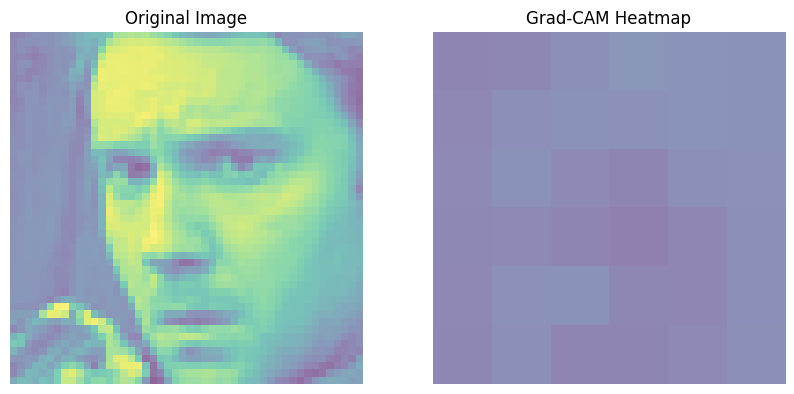

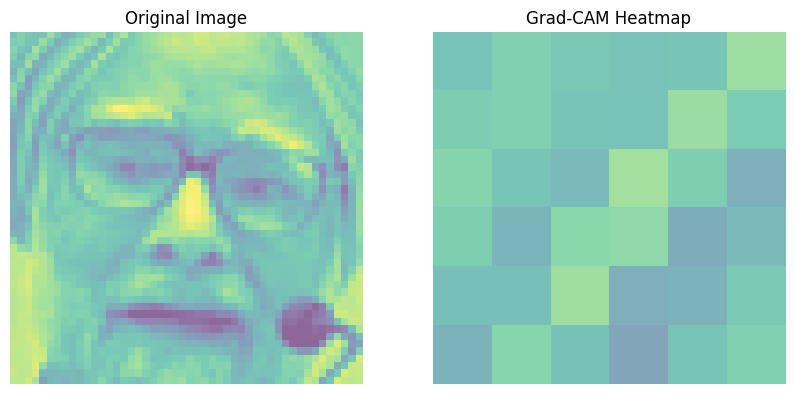

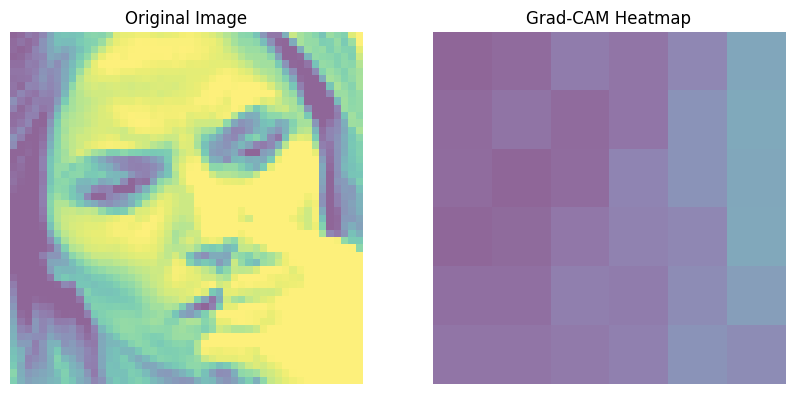

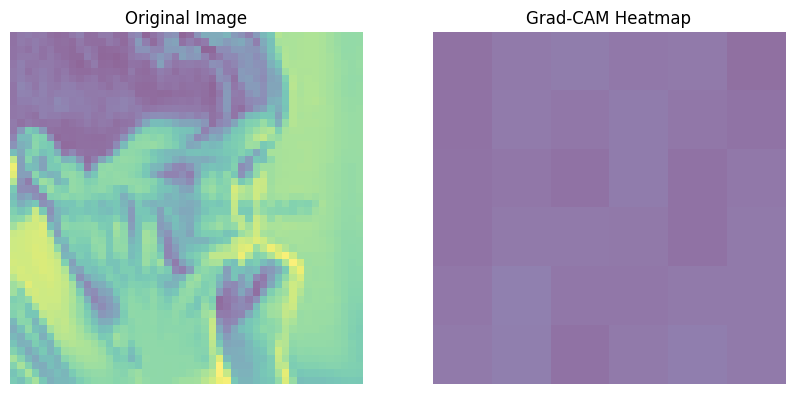

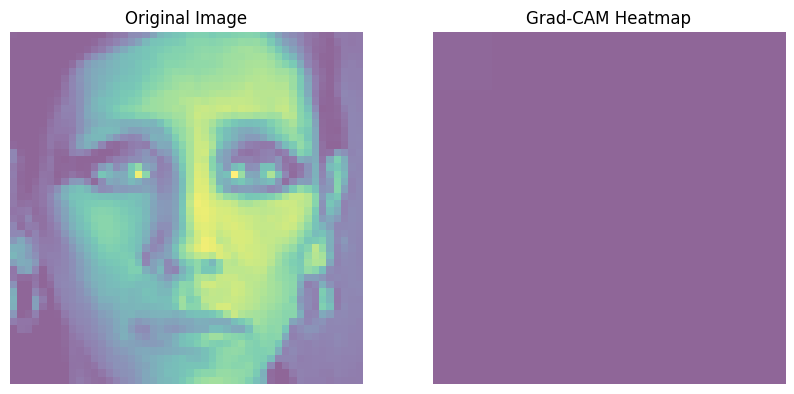

In [27]:
num_images = 5
processed_images = []
heatmaps = []
original_images = []
data = FERDataset(df_data, transform=TRAIN_TRANSFORM)

# Prepare the images and compute heatmaps
for i in range(num_images):
    image, _ = data[i]  # Get image
    image = image.unsqueeze(0).to(DEVICE)  # Process image
    heatmap = grad_cam(model, image, target_class=None, device=DEVICE)  # Compute heatmap
    processed_images.append(image)
    heatmaps.append(heatmap)
    original_images.append(image.squeeze(0).detach().cpu().numpy())  # Prepare original image

# Visualize
for heatmap, original_image in zip(heatmaps, original_images):
    plot_heatmap(heatmap.cpu(), original_image)  

## Run Training and Evaluation


In [ ]:
# Store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Tracking test loss and accuracy per class
test_loss = 0.0
class_correct = list(0. for i in range(len(CLASSES)))
class_total = list(0. for i in range(len(CLASSES)))

for epoch in range(NUM_EPOCHS):
    train_loss = train(model, train_loader, criterion, optimizer, DEVICE)
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, DEVICE)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy * 100)  # Convert fraction to percentage

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}%")

# Final evaluation on test set
model.eval()  # Set the model to evaluation mode
for data, target in test_loader:
    data, target = data.to(DEVICE), target.to(DEVICE)
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    correct = pred.eq(target.view_as(pred))
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Calculate and print the average test loss
test_loss = test_loss / len(test_loader.dataset)
print(f'Test Loss: {test_loss:.6f}')

# Print accuracy for each class
for i in range(len(CLASSES)):
    if class_total[i] > 0:
        print(f'Test Accuracy of {CLASSES[i]}: {100 * class_correct[i] / class_total[i]:.2f}% ({int(class_correct[i])} out of {int(class_total[i])})')
    else:
        print(f'Test Accuracy of {CLASSES[i]}: N/A (no training examples)')

# Overall test accuracy
print(f'Full Test Accuracy: {100. * sum(class_correct) / sum(class_total):.2f}% ({int(sum(class_correct))} out of {int(sum(class_total))})')


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1373: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.



Epoch [1/30], Train Loss: 1.7114, Val Loss: 1.4961, Val Accuracy: 0.4193%


## Plot training and validation loss and accuracy curves


In [ ]:
# Plot training and validation loss
loss_fig = go.Figure()
loss_fig.add_trace(
    go.Scatter(
        x=list(range(1, NUM_EPOCHS + 1)),
        y=train_losses,
        mode="lines+markers",
        name="Training Loss",
    )
)
loss_fig.add_trace(
    go.Scatter(
        x=list(range(1, NUM_EPOCHS + 1)),
        y=val_losses,
        mode="lines+markers",
        name="Validation Loss",
    )
)
loss_fig.update_layout(
    title="Training and Validation Loss",
    xaxis_title="Epoch",
    yaxis_title="Loss",
)
loss_fig.show()  # Automatically uses the default renderer set earlier

# Plot validation accuracy
acc_fig = go.Figure()
acc_fig.add_trace(
    go.Scatter(
        x=list(range(1, NUM_EPOCHS + 1)),
        y=val_accuracies,
        mode="lines+markers",
        name="Validation Accuracy",
    )
)
acc_fig.update_layout(
    title="Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy (%)"
)
acc_fig.show()  # Automatically uses the default renderer set earlier


## Get optimal hyperparameters


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Optimal hyperparameters: {}".format(study.best_trial.params))